# Práctica de Aprendizaje Automático

En esta práctica vamos a estudiar unos datos utilizando métodos de aprendizaje automático.

Esta práctica esta desarrollada por Belén Gómez Arnaldo con NIA 100472037 y Luis Gómez-Manzanilla Nieto con NIA 100472006.

---

## Imports

Para facilitar el resto del código, pondremos todos los imports necesarios a continuación.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

C:\Users\ferna\AppData\Local\Temp\ipykernel_1292\3292107214.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Lectura de datos 

Vamos a empezar leyendo el archivo de entrada *wind_ava.csv* e inctroduciendolo en un objeto de pandas

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

A continuación separaremos los conjuntos siendo *X* las entradas de *wind_ava* para la localización de Sotavento (13) y siendo *y* la energía eolíca que producirá el parque de Sotavento. 

In [3]:
#Solo nos interesan las variables que terminan en .13
x = wind_ava.filter(regex='\.13$')
y = wind_ava['energy']

---

## EDA

El primer paso de la práctica es realizar un EDA simplificado para conocer las características del conjunto de datos que estamos estudiando.

Para hacer una primera aproximación de los datos podemos utilizar la función *head()* que devueve las primeras 5 entradas.

In [4]:
x.head()

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


A primera vista los datos de todas las columnas parecen ser numéricos, pero vamos a anlizarlos más en profundidad.

### Dimension 

In [5]:
print('Dimensión de los datos')
print('===============================') 
print(x.shape)


Dimensión de los datos
(4748, 22)


El conjunto de datos tiene 22 características y 4748 instancias.

### Análisis de variables

In [6]:
print('Los datos son de los siguientes tipos')
print('===============================')
x.info()

Los datos son de los siguientes tipos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p54.162.13  4748 non-null   float64
 1   p55.162.13  4748 non-null   float64
 2   cape.13     4748 non-null   float64
 3   p59.162.13  4748 non-null   float64
 4   lai_lv.13   4748 non-null   float64
 5   lai_hv.13   4748 non-null   float64
 6   u10n.13     4748 non-null   float64
 7   v10n.13     4748 non-null   float64
 8   sp.13       4748 non-null   float64
 9   stl1.13     4748 non-null   float64
 10  u10.13      4748 non-null   float64
 11  v10.13      4748 non-null   float64
 12  t2m.13      4748 non-null   float64
 13  stl2.13     4748 non-null   float64
 14  stl3.13     4748 non-null   float64
 15  iews.13     4748 non-null   float64
 16  inss.13     4748 non-null   float64
 17  stl4.13     4748 non-null   float64
 18  fsr.13      4748 non-null   fl

Como se puede ver, todos los datos de las columnas son del tipo float64, es decir, no hay variables categóricas. A continuación comprobaremos si hay valores faltantes y, si es así, qué varibles los tienen. 

In [7]:
print('Valores faltantes')
print('======================================')
print(x.isnull().sum())

Valores faltantes
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64


Se puede observar que no hay ningún valor faltante en ninguna variable.

A continuación comporbaremos si hay variables con valores constantes

In [8]:
columnas_constantes = []
for columna in x.columns:
    if x[columna].nunique() == 1:
        columnas_constantes.append(columna)

if columnas_constantes:
    print("Las siguientes columnas tienen valores constantes:")
    for columna in columnas_constantes:
        print(f"- {columna}")
else:
    print("No hay columnas con valores constantes.")

No hay columnas con valores constantes.


Aunque no haya variables constantes, puede haber variables con valores muy parecidos. Para comprobar esto vamos a calcular la varianza de las variables y lo mostraremos en un gráfico.

Varianza de las variables
p54.162.13    2.009369e+09
p55.162.13    4.293153e+01
cape.13       1.482525e+04
p59.162.13    2.151950e+12
lai_lv.13     1.579087e-01
lai_hv.13     1.355691e-02
u10n.13       9.613612e+00
v10n.13       9.100875e+00
sp.13         5.093529e+05
stl1.13       4.114356e+01
u10.13        9.973619e+00
v10.13        9.355127e+00
t2m.13        3.798852e+01
stl2.13       3.077972e+01
stl3.13       2.100230e+01
iews.13       1.346989e-01
inss.13       1.436517e-01
stl4.13       1.262291e+01
fsr.13        5.779241e-05
flsr.13       8.903704e-03
u100.13       2.344235e+01
v100.13       2.178604e+01
dtype: float64


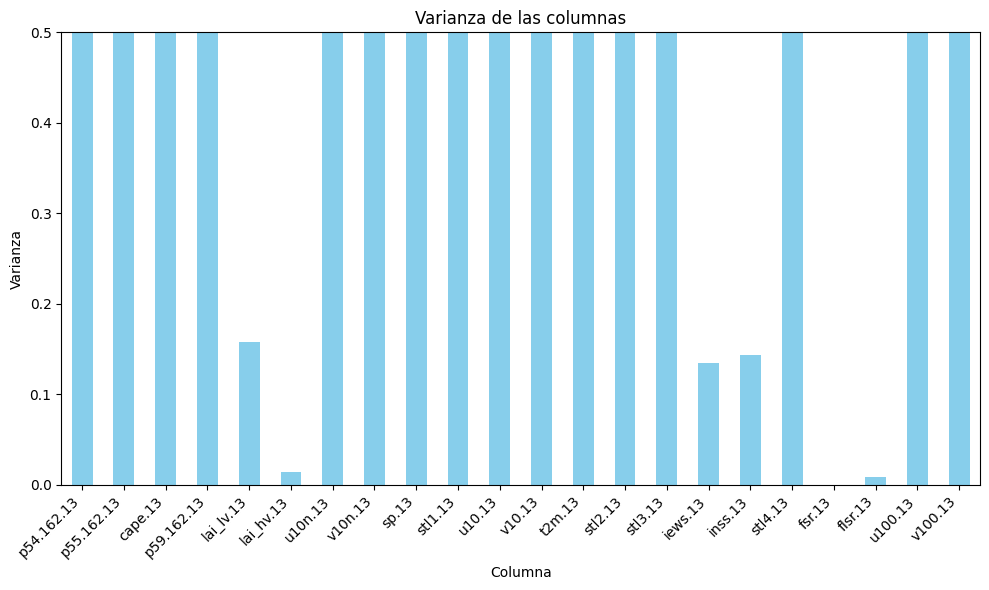

In [9]:
print('Varianza de las variables')
print(x.var())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
x.var().plot(kind='bar', color='skyblue')
plt.title('Varianza de las columnas')
plt.xlabel('Columna')
plt.ylabel('Varianza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()

Como se puede ver con estos resultados, hay algunas variables que tienen una varianza muy pequeña. Esto podría sugerir que los datos de estas variables son muy parecidos y no estarían influyendo mucho en el modelo

A continuación vamos a estudiar la correlación entre las variables. Utilizaremos un mapa de calor para representar la correlación entre variables.

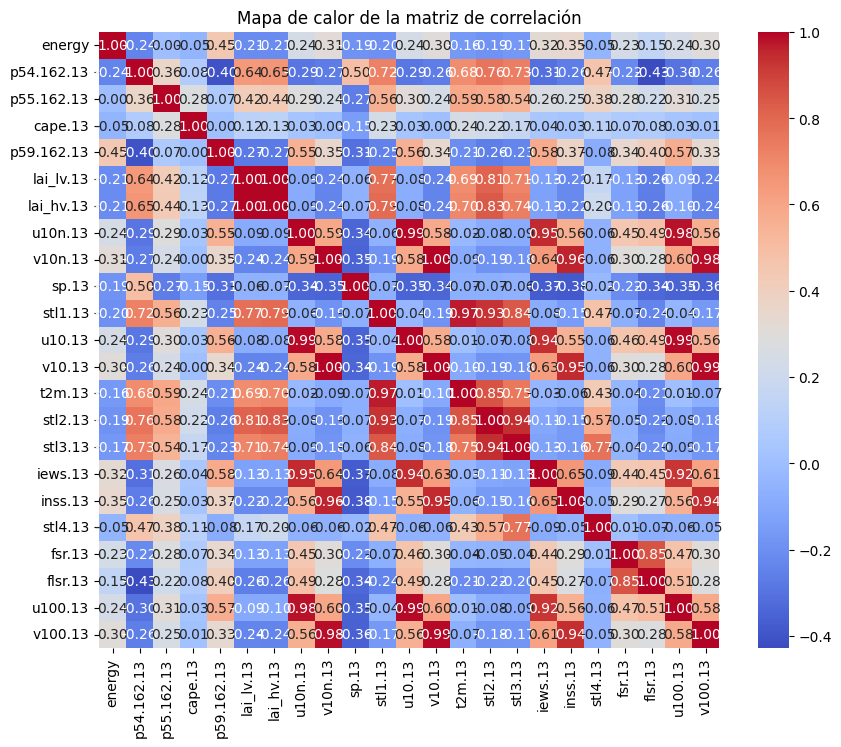

In [10]:
x_copia = x.copy()
x_copia.insert(0, "energy", y)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(x_copia.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Las casillas de color rojo oscuro corresponden a las varibles con más correlación. En un futuro se podrían evaluar las varibles para determinar si alguna se podría eliminar.

### Análisis de la variable de salida

Para determinar si es un problema de regresión o de clasificación, estudiaremos la variables de salida *energy*

In [11]:
print('La variable de salida es de tipo:')
print('===============================')
y.info()

La variable de salida es de tipo:
<class 'pandas.core.series.Series'>
RangeIndex: 4748 entries, 0 to 4747
Series name: energy
Non-Null Count  Dtype  
--------------  -----  
4748 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


La variable de salida es de tipo float64, es decir, es una variable continua, por lo que es un problema de regresión. Continuaremos analizando la distribución de la variable de salida.

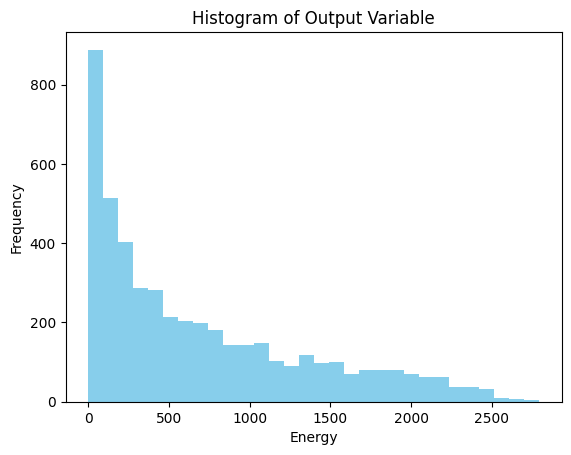

In [12]:
plt.hist(y, bins=30, color='skyblue')
plt.title('Histogram of Output Variable')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

Como podemos observar, tiene una distribución exponencial. Esto indica que para valores de poca energía hay muchas más muestras que para valores mayores.

## Evalucaión

Para llevar a cabo la evaluación outer a utilizar Holdout, donde dividiremos el conjunto de datos en dos, uno para entrenar y otro para comprobar el modelo. El conjunto de entrenamiento es 2/3 del conjunto total. Utilizaremos 3-fold crossvalidation para el ajuste de los hiperparámetros. Para la búsqueda de los hiperparámetros utilizaremos GridSearch, a menos que haya modelos con muchas combinaciones donde usaremos la búsqueda aleatoria.

Primero evaluaremos los modelos con sus hiperparámetros por omisión. Depués ajustaremos los hiperpárametros. Al final incluiremos unas conclusiones sobre qué modelos son mejores y cuáles tardan menos tiempo.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state=100472037)

Para evaluar los modelos cacularemos el error cuadrátcio medio y el coeficiente de derterminación con estas funciones

In [14]:
#Error cuadrático medio
def rmse(y_test, y_test_pred):
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

#coeficiente de determinación
def r2(y_test, y_test_pred):
    return metrics.r2_score(y_test, y_test_pred)

### Preproceso

Hay ciertos modelos que exigen un preproceso de los datos. Debido a esto utilizaremos un pipeline que realizará primero el preproceso de los datos y depués definirá el modelo.

Para el preproceso definiremos varias formas de normalizar lo datos. Más adelantes utilizaremos KNN para determinar la mejor fomra de normalizar los datos, que utilizaremos en todo el resto de modelos.

In [15]:
#normalización standard
standar = make_column_transformer(
    (StandardScaler(), X_train.columns),
)

#normalizacion por escala min-max
min_max = make_column_transformer(
    (MinMaxScaler(), X_train.columns)
)

### Dummy

Para una primera aproximación realizaremos el RegresorDummy basado en la media. Este es un modelo trivial y todos los modelos que hagamos más adelante deberían mejorar el resultado de este.

In [16]:
# Crear un modelo de referencia usando el dummy
modelo_dummy = DummyRegressor(strategy='mean')
t1 = time.time()
modelo_dummy.fit(X_train, y_train)
t2 = time.time()

# Calcular el error cuadrático medio y el coeficiente de determinación 
rmse_mean = rmse(y_test, modelo_dummy.predict(X_test))
r2_mean = r2(y_test, modelo_dummy.predict(X_test))
t_dummy_mean = t2-t1

print(f"RMSE de dummy(mean): {rmse_mean}")
print(f"R^2 de dummy(mean): {r2_mean}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de dummy(mean): 667.6287990469438
R^2 de dummy(mean): -0.0012269034359306819
Tiempo de entrenamiento:  0.001528024673461914


A continuación vamos a crear el regrsor dummy basado en la mediana para comprar los resultados.

In [17]:
modelo_dummy_median = DummyRegressor(strategy='median')
t1 = time.time()
modelo_dummy_median.fit(X_train, y_train)
t2 = time.time()

rmse_median= rmse(y_test, modelo_dummy_median.predict(X_test))
r2_median = r2(y_test, modelo_dummy_median.predict(X_test))
t_dummy_median = t2-t1

print(f"RMSE de dummy(mean): {rmse_median}")
print(f"R^2 de dummy(mean): {r2_median}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de dummy(mean): 696.231776442723
R^2 de dummy(mean): -0.08885504571728964
Tiempo de entrenamiento:  0.002116680145263672


En este caso, el regresor basado en la media tiene menor error. También se puede observar que al ser modelos muy simples tardan poco en ejecutarse.

### KNN

Para poder usar este modelo primero debemos normalizar los datos. Vamos a comprobar cual de las normalizaciones definidas anteriores es más adeaucda para este modelo, es decir, produce menor error.

In [41]:
pipe_knn_st = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', KNeighborsRegressor()) #salida del pipeline
])

np.random.seed(100472037)

t1 = time.time()
pipe_knn_st.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn_st.predict(X_test)

rmse_knn_st = rmse(y_test, y_test_pred)
r2_knn_st = r2(y_test, y_test_pred)
t_knn_st = t2 - t1
print(f"RMSE de the tree: {rmse_knn_st}")
print(f"R2 de the tree: {r2_knn_st}")
print("Tiempo de entrenamiento: ", t_knn_st)

RMSE de the tree: 402.4666157668746
R2 de the tree: 0.6361502255960982
Tiempo de entrenamiento:  0.020884275436401367


In [42]:
pipe_knn = Pipeline([
        ('preproceso', min_max), #entrada del pipeline
        ('regresor', KNeighborsRegressor()) #salida del pipeline
])

np.random.seed(100472037)

t1 = time.time()
pipe_knn.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn.predict(X_test)

rmse_knn = rmse(y_test, y_test_pred)
r2_knn =r2(y_test, y_test_pred)
t_knn = t2 - t1
print(f"RMSE de the tree: {rmse_knn}")
print(f"R2 de the tree: {r2_knn}")
print("Tiempo de entrenamiento: ", t_knn)

RMSE de the tree: 418.2405057451519
R2 de the tree: 0.6070705608374711
Tiempo de entrenamiento:  0.019201278686523438


Se ha comprobado que la mejor normalización es la estándar y es la que usaremos en el resto de modelos que lo necesiten. Ahora vamos a ajustar el hiperperámetro del número de vecinos para conseguir el mejor modelo, usando esta normalización.

In [46]:
# Search space
param_grid = {'regresor__n_neighbors': list(range(2,20))}  # Número de vecinos


# Inner evaluation
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

pipe_knn_hp = GridSearchCV(pipe_knn_st,
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         n_jobs=-1, verbose=1,)

t1 = time.time()
pipe_knn_hp.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn_hp.predict(X_test)

rmse_knn_hp = rmse(y_test, y_test_pred)
r2_knn_hp = r2(y_test, y_test_pred)
t_knn_hp = t2 - t1
print(f"RMSE de the tree: {rmse_knn_hp}")
print(f"R2 de the tree: {r2_knn_hp}")
print("Tiempo de entrenamiento: ", t_knn_hp)
pipe_knn_hp.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


RMSE de the tree: 396.9677355680996
R2 de the tree: 0.6460248241812517
Tiempo de entrenamiento:  1.938749074935913


{'regresor__n_neighbors': 8}

Se puede observar que ajustando el número de vecinos a 8 se mejora el error del modelo. Dentro del rango utilizado, el valor del mejor hiperparámetro no se encuentra en el extremo. Con este modelo el error mejora mucho con respecto al regresor trivial.

### Arboles de regresión

In [21]:
!pip install --upgrade linear-tree


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


El siguinete modelo que vamos a evaluar es un árbol de regresión lineal. Primero lo evaluaremos sin ajustar los hiperparámetros.

In [22]:
regr = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(100472037) 

t1 = time.time()
regr.fit(X_train, y_train)
t2 = time.time()

y_test_pred = regr.predict(X_test)

rmse_tree = rmse(y_test, y_test_pred)
r2_tree = r2(y_test, y_test_pred)
t_tree = t2 - t1
print(f"RMSE de the tree: {rmse_tree}")
print(f"R2 de the tree: {r2_tree}")
print("Tiempo de entrenamiento: ", t_tree)

RMSE de the tree: 373.98860391251424
R2 de the tree: 0.6858195744419211
Tiempo de entrenamiento:  37.09910225868225


Aún sin haber ajustado los hiperparámetros, podemos observar que este modelo tine menor error que el modelo dummy, aunque tarda más en ejecutarse. Ahora vamos a estudiar el ajuste de los hiperparámetros para minimizar el error.

In [47]:
# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(4,16,2))}

# Inner evaluation
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

regr_hp = GridSearchCV(LinearTreeRegressor(base_estimator=LinearRegression()),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         n_jobs=-1, verbose=1,
                        )
np.random.seed(100472037)

t1 = time.time()
regr_hp.fit(X=X_train, y=y_train)
t2 = time.time()

y_test_pred = regr_hp.predict(X_test)

rmse_tree_hp = rmse(y_test, y_test_pred)
r2_tree_hp = r2(y_test, y_test_pred)
t_tree_hp = t2 -t1
print(f"RMSE de the tree: {rmse_tree_hp}")
print(f"R2 de the tree: {r2_tree_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
regr_hp.best_params_, -regr_hp.best_score_

Fitting 3 folds for each of 42 candidates, totalling 126 fits


RMSE de the tree: 373.98860391251424
R2 de the tree: 0.6858195744419211
Tiempo de entrenamiento:  338.5309202671051


({'max_depth': 4, 'min_samples_split': 6}, 152601.30994544283)

### Regresores lineales

Primero crearemos el regresor lineal normal sin ninguna regularización y obtendremos el error de este modelo.

In [24]:
# Creación y entrenamiento del modelo lineal con la normalización standar
# ==============================================================================
pipe_regr_standar = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', LinearRegression()) #salida del pipeline
])
np.random.seed(100472037)

t1 = time.time()
pipe_regr_standar.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regr_standar.predict(X_test)

rmse_lineal = rmse(y_test, y_test_pred)
r2_lineal = r2(y_test, y_test_pred)
t_lineal = t2 - t1
print(f"RMSE de the tree: {rmse_lineal}")
print(f"R2 de the tree: {r2_lineal}")
print("Tiempo de entrenamiento: ", t_lineal)

RMSE de the tree: 547.6271133290638
R2 de the tree: 0.3263531698314581
Tiempo de entrenamiento:  0.019561290740966797


Como era de esperar, el regresor lineal mejora los valores del modelo dummy. Sin embargo, en este modelo no se ha utilizado ninguna regularización para controlar el sobreaprendizaje. A continuación, vamos a crear modelos con distintas regularizaciones para comprobar cual es la mejor.

#### Lasso


Primero crearemos el modelo con la regularización Lasso sin ajuste de hiperparámetros.

In [60]:
pipe_lasso = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', LassoCV(cv= 3)) #salida del pipeline
])
np.random.seed(100472037)

t1 = time.time()
pipe_lasso.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_lasso.predict(X_test)

rmse_lasso = rmse(y_test, y_test_pred)
r2_lasso = r2(y_test, y_test_pred)
t_lasso = t2 -t1
print(f"RMSE de the tree: {rmse_lasso}")
print(f"R2 de the tree: {r2_lasso}")
print("Tiempo de entrenamiento: ", t_lasso)
print(f"Mejor aplpha: {pipe_lasso['regresor'].alpha_}")

RMSE de the tree: 547.5168099091435
R2 de the tree: 0.32662451529278014
Tiempo de entrenamiento:  0.4694976806640625
Mejor aplpha: 0.29784034354424666


Vamos a ajustar el hiperparámetro alpha del modelo para observar los resultadod

In [69]:
pipe_regrLasso = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', LassoCV(alphas = np.logspace(-9, 3, 110),cv= 3)) #salida del pipeline
])
np.random.seed(100472037)
t1 = time.time()
pipe_regrLasso.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regrLasso.predict(X_test)

rmse_lasso_hp = rmse(y_test, y_test_pred)
r2_lasso_hp = r2(y_test, y_test_pred)
t_lasso_hp = t2 - t1
print(f"RMSE de the tree: {rmse_lasso_hp}")
print(f"R2 de the tree: {r2_lasso_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
print(f"Mejor aplpha: {pipe_regrLasso['regresor'].alpha_}")


RMSE de the tree: 547.5990045877215
R2 de the tree: 0.32642232228240453
Tiempo de entrenamiento:  1.6549806594848633
Mejor aplpha: 0.23279437221136298


La regularización Lasso permite 

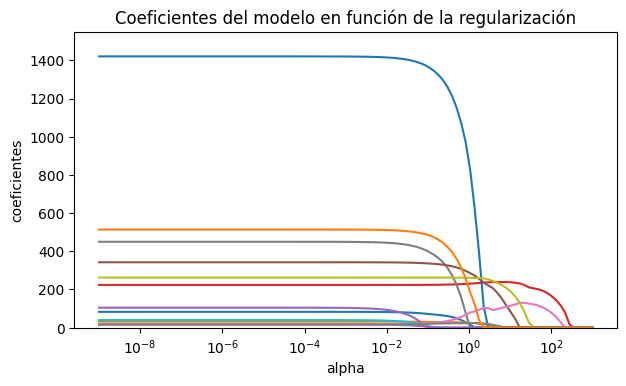

In [70]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = pipe_regrLasso['regresor'].alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Pipeline([
        ('preproceso', standar),
        ('regresor', Lasso(alpha=alpha, fit_intercept=False))
    ])
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp['regresor'].coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-2.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

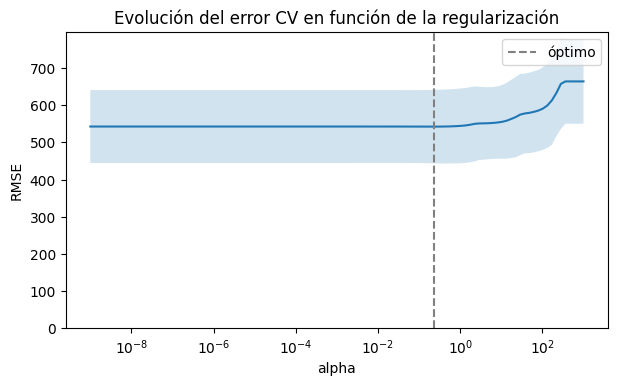

In [71]:
# Evolución del error en función de alpha
# ==============================================================================
# regrLasso.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = pipe_regrLasso['regresor'].mse_path_.mean(axis=1)
mse_sd = pipe_regrLasso['regresor'].mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = pipe_regrLasso['regresor'].alphas_[np.argmin(rmse_cv)]
optimo_1sd   = pipe_regrLasso['regresor'].alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(pipe_regrLasso['regresor'].alphas_, rmse_cv)
ax.fill_between(
    pipe_regrLasso['regresor'].alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

#ax.axvline(
#    x         = optimo_1sd,
#    c         = "blue",
#    linestyle = '--',
#    label     = 'óptimo_1sd'
#)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

A continuación vamos a generar un modelo Ridge ajustando sus hiperparámetros

In [28]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
pipe_regrRidge = Pipeline([
        ('preproceso', min_max),
        ('regresor', RidgeCV(
            alphas          = np.logspace(-3, 8, 200),
            fit_intercept   = True,
            store_cv_values = True
         ))
])

np.random.seed(42)
pipe_regrRidge.fit(X_train, y_train)
t1 = time.time()
pipe_regr.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regrRidge.predict(X_test)

rmse_lineal = rmse(y_test, y_test_pred)
r2_lineal = r2(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_lineal}")
print(f"R2 de the tree: {r2_lineal}")
print("Tiempo de entrenamiento: ", t2 - t1)
print(f"Mejor aplpha: {pipe_regr['regresor'].alpha_}")


RMSE de the tree: 547.3912201385593
R2 de the tree: 0.32693339849729863
Tiempo de entrenamiento:  0.5025894641876221
Mejor aplpha: 0.04985048869732099


Por último, vamos a generar el modelo Elastic Net

In [29]:
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
pipe_regrElastic = Pipeline([
        ('preproceso', min_max),
        ('regresor', ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 3)
        )
])

np.random.seed(100472037)
t1 = time.time()
pipe_regrElastic.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regrElastic.predict(X_test)

rmse_lineal = rmse(y_test, y_test_pred)
r2_lineal = r2(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_lineal}")
print(f"R2 de the tree: {r2_lineal}")
print("Tiempo de entrenamiento: ", t2 - t1)
print(f"Mejor aplpha: {pipe_regrElastic['regresor'].alpha_}")


RMSE de the tree: 547.3884781393232
R2 de the tree: 0.32694014154839957
Tiempo de entrenamiento:  10.290603399276733
Mejor aplpha: 0.00029331662783900486


Aunque hemos podido ir viendo los errores de cada modelo, vamos a mostrarlos en el siguiente gráfico.

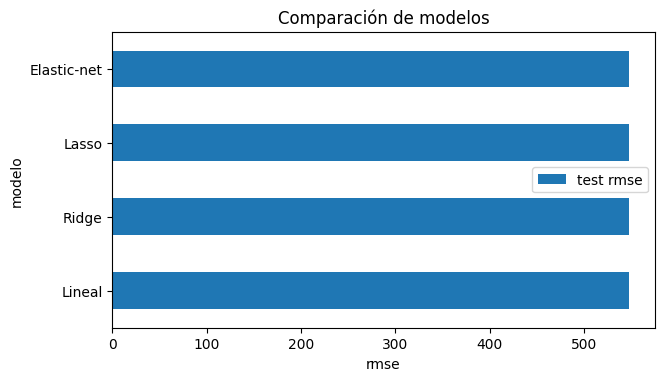

In [30]:
rmse_lineal = rmse(y_test, pipe_regr_mm.predict(X=X_test))
rmse_ridge = rmse(y_test, pipe_regrRidge.predict(X=X_test))
rmse_lasso = rmse(y_test, pipe_regrLasso.predict(X=X_test))
rmse_elastic = rmse(y_test, pipe_regrElastic.predict(X=X_test))
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

En este problema no hay mucha diferencia entre el modelo lineal y los modelos regularizados en cuanto al rmse. Vamos a comprobar los valores de los coeficientes con cada modelo para ver como cambia la importancia de cada variable.

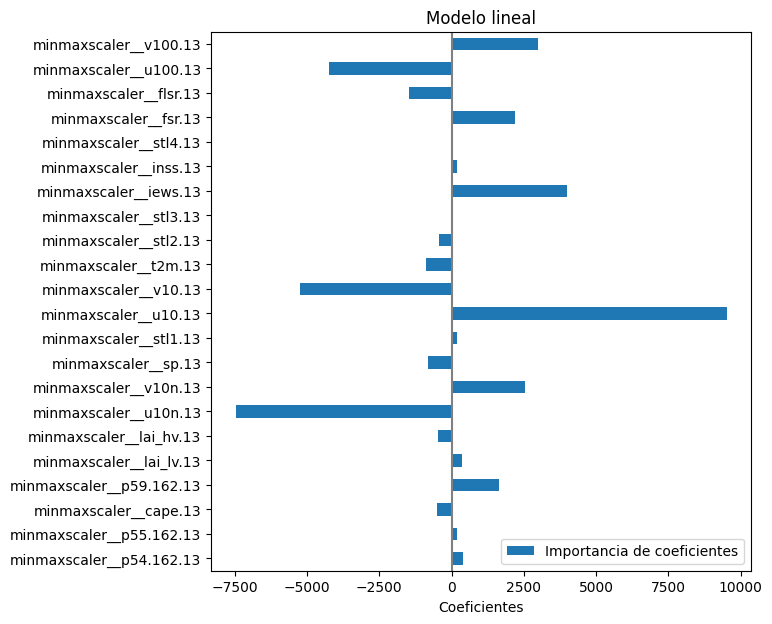

In [31]:
feature_names = pipe_regr_mm[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regr_mm['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo lineal")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

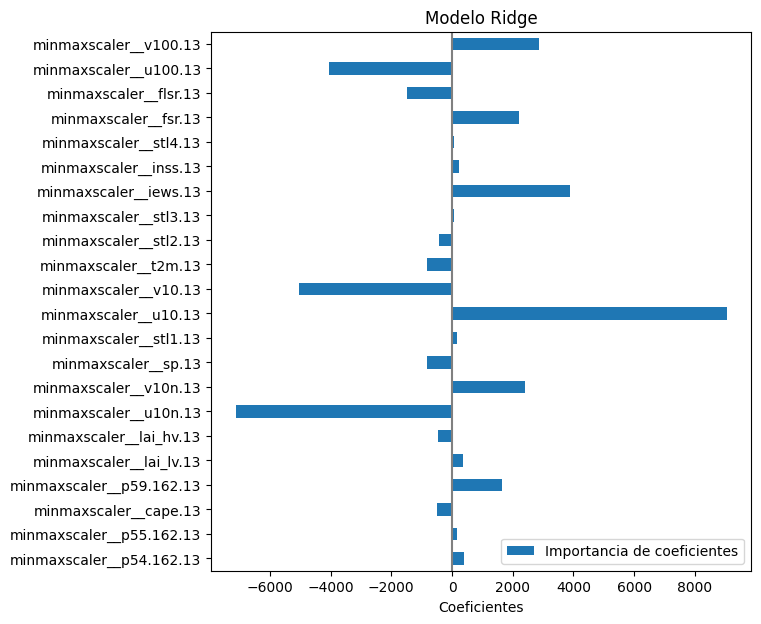

In [32]:
feature_names = pipe_regrRidge[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regrRidge['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Ridge")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

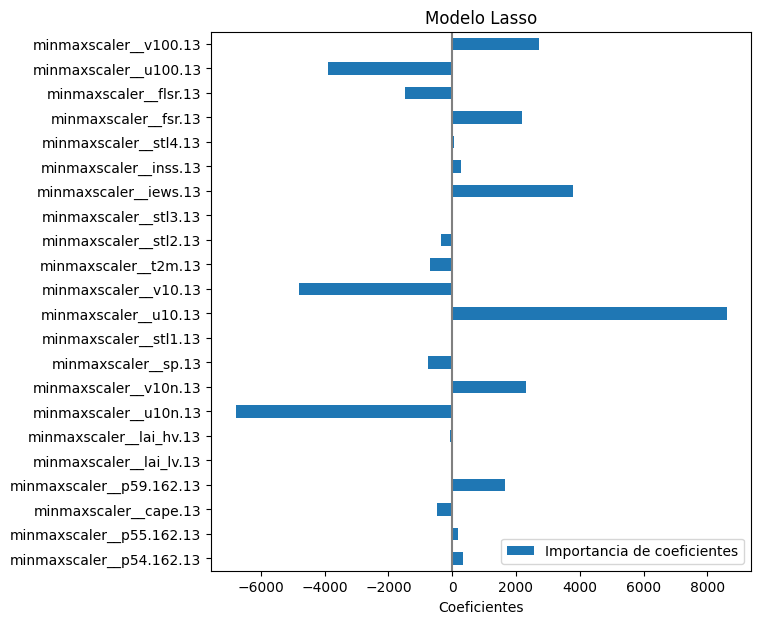

In [33]:
feature_names = pipe_regrLasso[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regrLasso['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Lasso")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

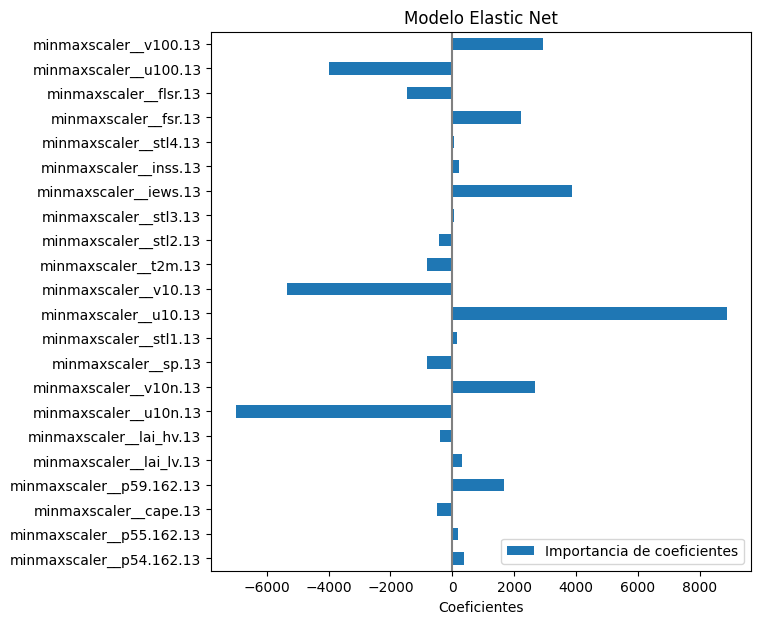

In [34]:
coefs = pd.DataFrame(
    pipe_regrElastic['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Elastic Net")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Tampoco varía mucho la importancia de los coeficientes, pero se puede observar que con el modelo de Lasso algunos de los coeficientes llegan a valer 0.

### SVM

Para crear este modelo, primero debemos normalizar los datos. Vamos a comprobar que normalización de las definidas anteriormente es más adecuada en este caso.

In [35]:
# Creación del modelo SVM
# ==============================================================================
modeloSVR = SVR(kernel = 'linear')

pipe_regr_radial = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_radial.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regr_radial.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_svm}")
print(f"R2 de the tree: {r2_svm}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de the tree: 590.3226215492126
R2 de the tree: 0.21721726519356954
Tiempo de entrenamiento:  1.2943742275238037


In [36]:
# Creación del modelo SVM lineal
# ==============================================================================
modeloSVR = SVR(kernel = 'linear')

pipe_regr_radial_mm = Pipeline([
    ('escalar', min_max),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_radial_mm.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regr_radial_mm.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_svm}")
print(f"R2 de the tree: {r2_svm}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de the tree: 659.2302491198861
R2 de the tree: 0.023804862251791348
Tiempo de entrenamiento:  1.0223896503448486


Como se puede observar, la normalización estandard produce un error menor que la normalización minmax, por lo que es el que usaremos para SVM. A continuación proceedemos a realizar el ajuste de hiperparámetros para tratar de mejorar el modelo.


In [37]:
param_grid = {'SVM__C': [0.1, 1, 10, 100, 1000, 10000]}


inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

hpo_regr_radial = GridSearchCV(pipe_regr_radial,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=inner,
                        n_jobs=4, verbose=1)


np.random.seed(100472037)
t1 = time.time()
hpo_regr_radial.fit(X=X_train, y=y_train)
t2 = time.time()

y_test_pred = hpo_regr_radial.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_svm}")
print(f"R2 de the tree: {r2_svm}")
print("Tiempo de entrenamiento: ", t2 - t1)
hpo_regr_radial.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
RMSE de the tree: 580.4898723024722
R2 de the tree: 0.24307703760644728
Tiempo de entrenamiento:  79.98681998252869


{'SVM__C': 10000}

In [38]:
# Creación del modelo SVM lineal
# ==============================================================================
modeloSVR = SVR()

pipe_regr_radial_mm = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_radial_mm.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regr_radial_mm.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_svm}")
print(f"R2 de the tree: {r2_svm}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de the tree: 637.255997841405
R2 de the tree: 0.08779961814909787
Tiempo de entrenamiento:  4.219024181365967


In [39]:
param_grid = {'SVM__C': [0.1, 1, 10, 100, 1000, 10000]}


inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

hpo_regr_radial = GridSearchCV(pipe_regr_radial_mm,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=inner,
                        n_jobs=4, verbose=1)


np.random.seed(100472037)
t1 = time.time()
hpo_regr_radial.fit(X=X_train, y=y_train)
t2 = time.time()

y_test_pred = hpo_regr_radial.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE de the tree: {rmse_svm}")
print(f"R2 de the tree: {r2_svm}")
print("Tiempo de entrenamiento: ", t2 - t1)
hpo_regr_radial.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RMSE de the tree: 358.5111651320538
R2 de the tree: 0.7112860575307952
Tiempo de entrenamiento:  31.127981901168823


{'SVM__C': 1000}

### Comparación de modelos

A partir de los modelos desarrollados, se pueden obtene las siguientes conclusiones:
- Todos los modelos mejoran el resultado del modelo trivial. Esto era lo esprable ya que el modelo trivial solo usaba la media para dar un resultado.
- El modelo que más ha mejorado el error cuadrático media ha sido el árbol de regresión, aunque tras ajustar sus hiperparámetros no mejoraba el resultado, lo que nos parece extraño ya que usamos GridSearch para encontrar los mejores hiperparámteros. Además, haciendo esto el modelo tarda bastante más en entrenarse. El siguiente modelo que ha dado mejores resultadoa ha sido el knn utilizando los 8 vecinos más cercanos para la calsificación.